In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [15]:
default = pd.read_csv('Data file.csv')
default

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [16]:
default.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [17]:
default.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [18]:
default['pcircle'].unique()

array(['UPW'], dtype=object)

In [19]:
default['label'].value_counts()    # highly imbalanced 

1    183431
0     26162
Name: label, dtype: int64

In [20]:
default.drop(['Unnamed: 0','pcircle'],axis=1,inplace=True)

In [21]:
default.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate'],
      dtype='object')

In [22]:
default["day"] = pd.to_datetime(default.pdate,format='%Y-%m-%d').dt.day
default["month"] = pd.to_datetime(default.pdate,format='%Y-%m-%d').dt.month
default["year"] = pd.to_datetime(default.pdate,format='%Y-%m-%d').dt.year
default["day of week"] = pd.to_datetime(default.pdate,format='%Y-%m-%d').dt.dayofweek                

In [23]:
default.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [24]:
default.drop('pdate',axis=1,inplace=True)

In [25]:
default['year'].unique()

array([2016], dtype=int64)

In [26]:
default.drop('year',axis=1,inplace=True)

In [27]:
default.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month,day of week
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7,2
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8,2
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8,4
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6,0
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFE3AB8F48>,
      dtype=object)

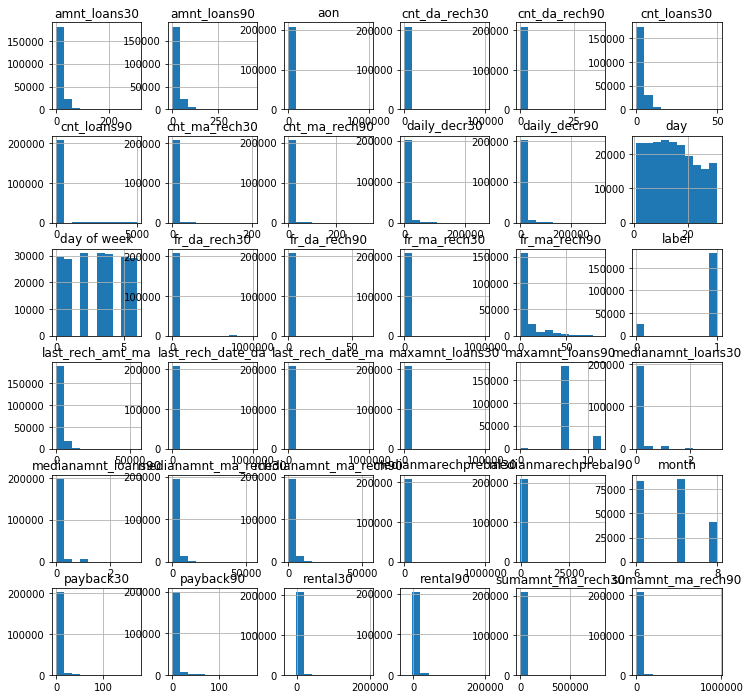

In [28]:
default.hist(figsize=(12,12))

In [29]:
default.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

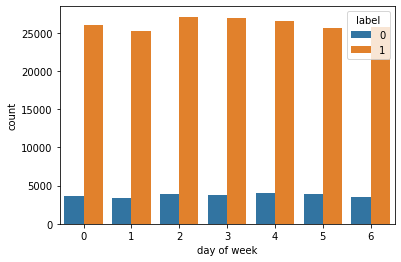

In [30]:
sns.countplot(x="day of week",data=default,hue='label')

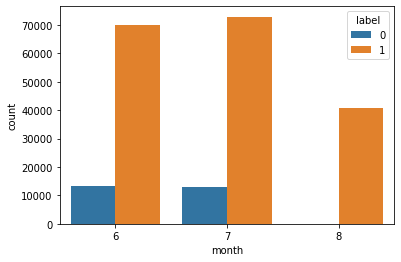

In [31]:
sns.countplot(x="month",data=default,hue='label')

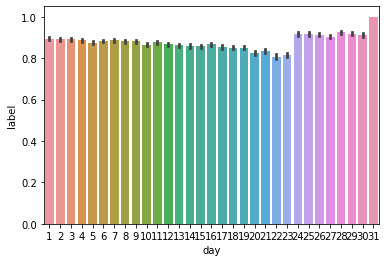

In [32]:
sns.barplot(x="day",y='label',data=default)

In [33]:
default['month'].unique()

array([7, 8, 6], dtype=int64)

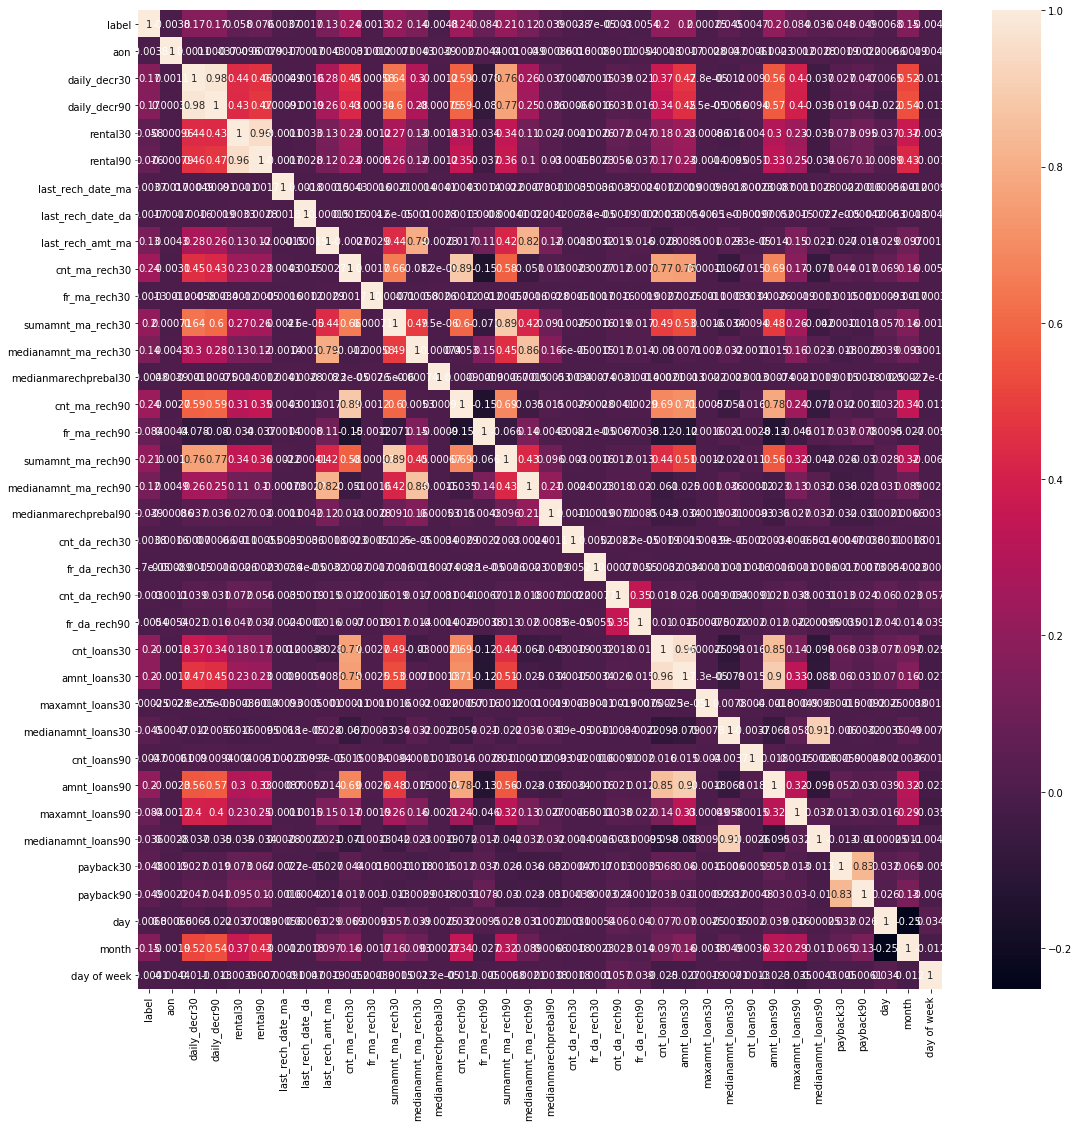

In [25]:
plt.figure(figsize=(18,18))
sns.heatmap(default.corr(),annot=True)
plt.show()

In [31]:
default

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day,month,day of week
0,0,NaN,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7,2
1,1,NaN,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8,2
2,1,NaN,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8,4
3,1,NaN,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6,0
4,1,NaN,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,NaN,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6,4
209589,1,NaN,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6,6
209590,1,NaN,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7,4
209591,1,NaN,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7,0


In [30]:
default.drop('msisdn',axis=1,inplace=True)

In [31]:
x= default.drop('label',axis=1)
y= default['label']
df_x= default.drop('label',axis=1)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)

In [33]:
xpca = pca.fit_transform(x)
x =xpca


In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [35]:
x

array([[-0.10389352, -0.09518996, -0.06242614, ..., -0.00133402,
        -0.1495231 ,  0.13145323],
       [-0.09802165, -0.09430526, -0.06240527, ..., -0.57425394,
        -0.74639412, -0.20412983],
       [-0.100427  , -0.09440483, -0.06186978, ..., -0.00603319,
        -0.17459104, -0.07539934],
       ...,
       [-0.0940285 , -0.09454344, -0.06261878, ..., -0.76202494,
        -0.04912437,  1.09864392],
       [-0.08451024, -0.09286166, -0.06157138, ..., -0.57162959,
        -0.53548832,  0.75933608],
       [-0.08649237, -0.09004878, -0.05975793, ..., -0.39172694,
         0.71043274,  0.16702912]])

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [37]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

In [38]:
parameters = {"n_estimators": range(1,20)}
rsc = RandomizedSearchCV(rfc,parameters,cv=5)
rsc.fit(x,y)
rsc.best_params_

{'n_estimators': 17}

In [67]:
parameters = {"n_neighbors": range(1,20)}
rsc = RandomizedSearchCV(knn,parameters,cv=5)
rsc.fit(x,y)
rsc.best_params_

{'n_neighbors': 19}

In [72]:
knn =KNeighborsClassifier(n_neighbors=19)
dt= DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators= 17)
gnb = GaussianNB()
lr = LogisticRegression()

In [40]:
x_train.shape

(140427, 16)

In [41]:
y_train.value_counts()

1    122957
0     17470
Name: label, dtype: int64

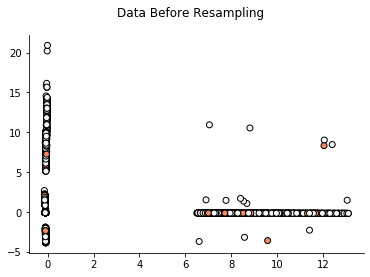

In [62]:
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_test]
plt.scatter(x_test[:, 0], x_test[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Data Before Resampling")
pass

In [65]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   65  8627]
 [   64 60410]]
0.8743457768267646
              precision    recall  f1-score   support

           0       0.50      0.01      0.01      8692
           1       0.88      1.00      0.93     60474

    accuracy                           0.87     69166
   macro avg       0.69      0.50      0.47     69166
weighted avg       0.83      0.87      0.82     69166



In [73]:
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 2786  5906]
 [ 1569 58905]]
0.8919266691727149
              precision    recall  f1-score   support

           0       0.64      0.32      0.43      8692
           1       0.91      0.97      0.94     60474

    accuracy                           0.89     69166
   macro avg       0.77      0.65      0.68     69166
weighted avg       0.88      0.89      0.88     69166



In [66]:
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 7492  1200]
 [32192 28282]]
0.5172194430789694
              precision    recall  f1-score   support

           0       0.19      0.86      0.31      8692
           1       0.96      0.47      0.63     60474

    accuracy                           0.52     69166
   macro avg       0.57      0.66      0.47     69166
weighted avg       0.86      0.52      0.59     69166



In [42]:
 rfc.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3306  5386]
 [ 1383 59091]]
0.9021339964722551
              precision    recall  f1-score   support

           0       0.71      0.38      0.49      8692
           1       0.92      0.98      0.95     60474

    accuracy                           0.90     69166
   macro avg       0.81      0.68      0.72     69166
weighted avg       0.89      0.90      0.89     69166



In [44]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()

In [45]:
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 3130  5562]
 [ 1398 59076]]
0.8993725240725212
              precision    recall  f1-score   support

           0       0.69      0.36      0.47      8692
           1       0.91      0.98      0.94     60474

    accuracy                           0.90     69166
   macro avg       0.80      0.67      0.71     69166
weighted avg       0.89      0.90      0.89     69166



In [46]:
from imblearn.over_sampling import ADASYN,SMOTE

x_resampled, y_resampled = SMOTE().fit_sample(x, y)

In [47]:
x_resampled.shape

(366862, 16)

In [48]:
 y_resampled.value_counts()

1    183431
0    183431
Name: label, dtype: int64

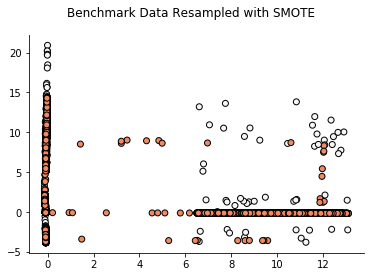

In [63]:
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(x_resampled[:, 0], x_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
pass

In [68]:
lr.fit(x_resampled,y_resampled)
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 7526  1166]
 [23842 36632]]
0.6384350692536795
              precision    recall  f1-score   support

           0       0.24      0.87      0.38      8692
           1       0.97      0.61      0.75     60474

    accuracy                           0.64     69166
   macro avg       0.60      0.74      0.56     69166
weighted avg       0.88      0.64      0.70     69166



In [74]:
knn.fit(x_resampled,y_resampled)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 7720   972]
 [13631 46843]]
0.7888702541711246
              precision    recall  f1-score   support

           0       0.36      0.89      0.51      8692
           1       0.98      0.77      0.87     60474

    accuracy                           0.79     69166
   macro avg       0.67      0.83      0.69     69166
weighted avg       0.90      0.79      0.82     69166



In [69]:
gnb.fit(x_resampled,y_resampled)
y_pred = gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 7795   897]
 [36179 24295]]
0.463956279096666
              precision    recall  f1-score   support

           0       0.18      0.90      0.30      8692
           1       0.96      0.40      0.57     60474

    accuracy                           0.46     69166
   macro avg       0.57      0.65      0.43     69166
weighted avg       0.87      0.46      0.53     69166



In [49]:
rfc.fit(x_resampled,y_resampled)
y_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8690     2]
 [   11 60463]]
0.9998120463811699
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8692
           1       1.00      1.00      1.00     60474

    accuracy                           1.00     69166
   macro avg       1.00      1.00      1.00     69166
weighted avg       1.00      1.00      1.00     69166



In [50]:
xgb.fit(x_resampled,y_resampled)
y_pred = xgb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 6996  1696]
 [10866 49608]]
0.8183789723274442
              precision    recall  f1-score   support

           0       0.39      0.80      0.53      8692
           1       0.97      0.82      0.89     60474

    accuracy                           0.82     69166
   macro avg       0.68      0.81      0.71     69166
weighted avg       0.89      0.82      0.84     69166



In [51]:
dt.fit(x_resampled,y_resampled)
y_pred = dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8692     0]
 [    1 60473]]
0.9999855420293208
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8692
           1       1.00      1.00      1.00     60474

    accuracy                           1.00     69166
   macro avg       1.00      1.00      1.00     69166
weighted avg       1.00      1.00      1.00     69166



In [52]:
x_ada, y_ada = ADASYN().fit_sample(x, y) 

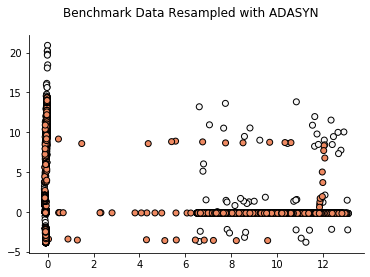

In [64]:
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_ada]
plt.scatter(x_ada[:, 0], x_ada[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with ADASYN")
pass

In [70]:
lr.fit(x_ada,y_ada)
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 7772   920]
 [26819 33655]]
0.5989503513286875
              precision    recall  f1-score   support

           0       0.22      0.89      0.36      8692
           1       0.97      0.56      0.71     60474

    accuracy                           0.60     69166
   macro avg       0.60      0.73      0.53     69166
weighted avg       0.88      0.60      0.66     69166



In [75]:
knn.fit(x_ada,y_ada)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8367   325]
 [17306 43168]]
0.7450915189543995
              precision    recall  f1-score   support

           0       0.33      0.96      0.49      8692
           1       0.99      0.71      0.83     60474

    accuracy                           0.75     69166
   macro avg       0.66      0.84      0.66     69166
weighted avg       0.91      0.75      0.79     69166



In [71]:
gnb.fit(x_ada,y_ada)
y_pred = gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 7880   812]
 [37393 23081]]
0.44763323019980916
              precision    recall  f1-score   support

           0       0.17      0.91      0.29      8692
           1       0.97      0.38      0.55     60474

    accuracy                           0.45     69166
   macro avg       0.57      0.64      0.42     69166
weighted avg       0.87      0.45      0.52     69166



In [53]:
rfc.fit(x_ada,y_ada)
y_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8691     1]
 [    3 60471]]
0.9999421681172831
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8692
           1       1.00      1.00      1.00     60474

    accuracy                           1.00     69166
   macro avg       1.00      1.00      1.00     69166
weighted avg       1.00      1.00      1.00     69166



In [54]:
xgb.fit(x_ada,y_ada)
y_pred = xgb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 7465  1227]
 [13964 46510]]
0.7803689674117341
              precision    recall  f1-score   support

           0       0.35      0.86      0.50      8692
           1       0.97      0.77      0.86     60474

    accuracy                           0.78     69166
   macro avg       0.66      0.81      0.68     69166
weighted avg       0.90      0.78      0.81     69166



In [55]:
dt.fit(x_ada,y_ada)
y_pred = dt.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8692     0]
 [    1 60473]]
0.9999855420293208
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8692
           1       1.00      1.00      1.00     60474

    accuracy                           1.00     69166
   macro avg       1.00      1.00      1.00     69166
weighted avg       1.00      1.00      1.00     69166

